## 2020707035 박시언 homework6 : autoencoder, variational autoencoder, GAN

### [intro]
autoencoder는 demention reduction의 역할을 한다. encoder를 거쳐 latent space에 mapping 된다. 단, 이는 discrete한 vector-point로 mapping 된다.
따라서 discrete한 그 지점의 latent vector를 decoder에 넣었을 때 이미지의 복원을 보장하지만, 그 지점을 벗어나는(비슷하지만 다른) latent vector에 대해서는 복원을 보장하지 않는다.

VAE는 Autoencoder와 달리 latent space를 가우시안 정규분포를 따르도록 학습시키며, reconstruction loss와 KL-divergence loss를 함께 사용한다.
KL-divergence는 두 확률 분포 간의 차이를 측정하는 수학적 지표이다

gan은 적대적 신경망으로 generator는 discriminator를 속이는 loss를 갖는다. generator는 가우시안 정규분포를 갖는 latent-z vector를 사용하여 upconv 과정을 거치게 된다.
이후 discriminator는 해당 사진이 진짜인지 아닌지를 학습하게 된다. 따라서 한 쪽의 loss가 커녔다 작아졌다를 반복한다.

해당 레포트 작성자 박시언은 loss의 발산을 막기 위해서 노말라이즈를 거치고 모델의 출력에는 sigmoid를 씌워서 0~1로 출력을 제한했다.
데이터는 0~1로 노말라이즈 시키고 BCEloss를 사용하여 복원 Loss에 이용했다.

latent loss는 kl divergence를 사용했다. 이 때 beta coeff를 사용해서 divergence loss의 영향을 조절할 수 있게 했다.

### [experiment] , [data]
datasms celab-HQ256을 사용했다.
validation loss patient 2를 기준으로 진전이 없을 떄 early-stop을 진행하였다.
lr, optim은 고정하였다. 데이터 또한 동일하게 사용하였다. validation freq는 매 epoch마다 진행한다.

### [고찰]

해당 실험을 진행하면서 모델이 동일한 사진만 복원해내는 문제를 겪었다. 처음에 필자는 rand변수가 고정되었거나 어디서 시드가 꼬여서 해당 현상이 일어난다 생각했지만, 이는 틀린 생각이었다. latent-d가 너무 작았기에 (128)
각각의 이미지들이 latent space에 embedding되지 않았다. latent space-d를 512로 늘렸을 때 VAE의 성능이 비약적으로 상승했다.

gan 또한 동일하다. 필자는 비교적 고해상도의 이미지 생성을 원했기에 256,256이미지를 만들어야 했다.
256 256 이미지 3만장 정도를 128-d latent space에 매핑하기에는 차원이 부족했다.
gan의 start latent variable dimension을 512로 잡고 실험을 진행했을 때 의미있는 모델의 학습이 이루어졌다. 이는 model collapse라 부르는 현상이다.

다른 문제점은 특히 gan의 학습 모니터링을 어떻게 해야하는지 알 수가 없었다. generation image의 분포와 실제 이미지의 분포의 차이를 모니터링 포인트로 잡아서 해당 차이가 적절히 줄어들었을 때 학습을 멈추면 어떨까 라는 생각을 해봤지만,
구현의 미숙으로 학습 중간중간 generation image를 확인하면서 학습 종료 지점을 수동으로 선택했다. 즉, training dynamics loss는 모델의 현재 성능을 대표하지 않기 때문에 모니터링의 어려움이 있었다.

### [conclusion]

각각 autoencoder&VAE의 decoder를 사용하여 가우시안 분포를 갖는 latent vector를 사용하여 모델의 복원을 시각화 하였다.
gan은 generator 만을 사용하여 이미지 생성을 시각화 하였다.

autoencoder : 복원을 진행하지 못한다. discrete 한 특정 포인트를 매핑하지 못하면 노이즈가 발생한다.
VAE : 복원을 잘 진행하지만, gan보다 못하다. 
gan : 앞서 말한 두 모델보다는 좋은 성능을 보인다. 다만, 비슷한 패턴의 이미지만 생성하는 문제가 있었다.

이는 필자가 이전에 gan을 미리 다루어 보았을 때 직면했던 문제로 모델 model collapse라 불리는 현상이다. 이는 earth mover's distance lossfmf 사용하여 해결한 수 있다.

## using generator or decoder only

### all model test_bench_1
<img width="589" alt="image" src="https://github.com/user-attachments/assets/b87d6656-207b-458f-9bce-b0f27d65d1c1">

### all model test_bench_1
![img_2.png](img_2.png)

### autoencoder
![img_3.png](img_3.png)

### vae
![img_4.png](img_4.png)

### gan using channel attention
![img_5.png](img_5.png)

### gan
![img_1.png](img_1.png)

### IO 병목 때문에 np_array파일로 데이터를 미리 128,3,256,256으로 들고있다가 dataset에서 yeild 하게 return






Loading Data into Memory: 100%|██████████| 235/235 [00:08<00:00, 26.16it/s]
/tmp/ipykernel_7077/2240019063.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.l

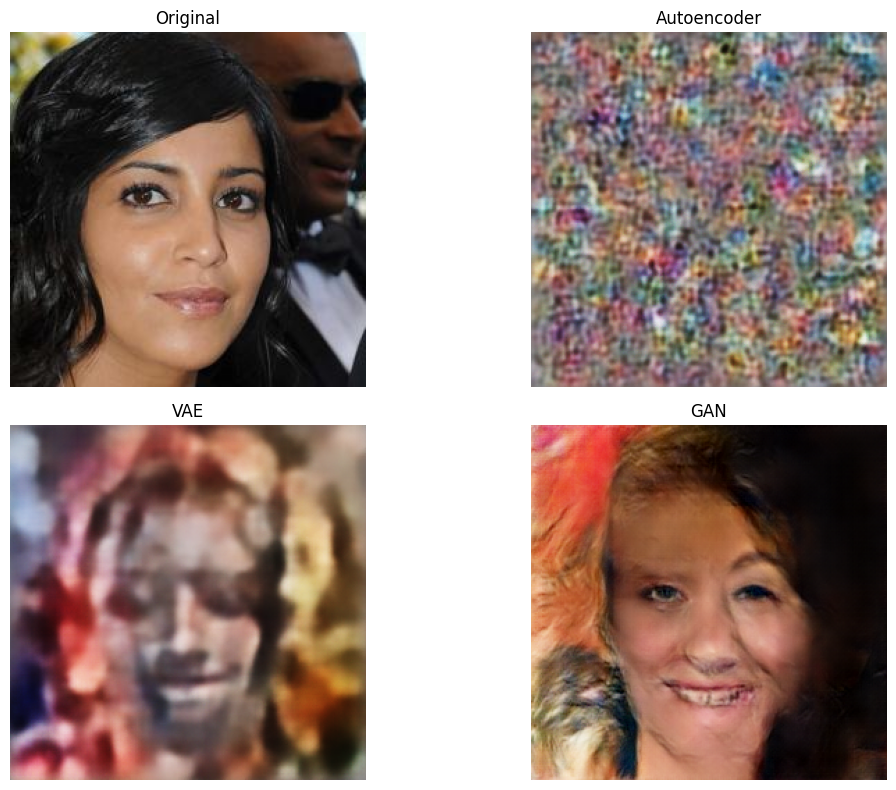

In [1]:
import torch
import matplotlib.pyplot as plt
from VAE import VAE
from Gan import Generator as GANGenerator
from AutoEncoder import Autoencoder
import numpy as np
import json
from dataloader import Dataset
from benchmarker import test_models

# Dataset 초기화
dataset = Dataset('./test.json')

# 모델 초기화
autoencoder = Autoencoder()
vae = VAE(latent_dim=512)
gan_generator = GANGenerator(latent_dim=512)
# 모델 체크포인트 로드
autoencoder.load_state_dict(torch.load('model_checkpoint_best_autoencoder.pth'))
vae.load_state_dict(torch.load('model_checkpoint_best_vae.pth'))
gan_generator.load_state_dict(torch.load('model_checkpoint_generator.pth'))

# 테스트 실행
test_models(autoencoder, vae, gan_generator, dataset, device='cuda' if torch.cuda.is_available() else 'cpu')

Loading Data into Memory: 100%|██████████| 235/235 [00:03<00:00, 63.22it/s]
/media/unsi/media/code/machine_learning/lab7/tester.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fea

Loaded model weights from ./model_checkpoint_best_autoencoder.pth


Testing:   0%|          | 0/235 [00:00<?, ?it/s]

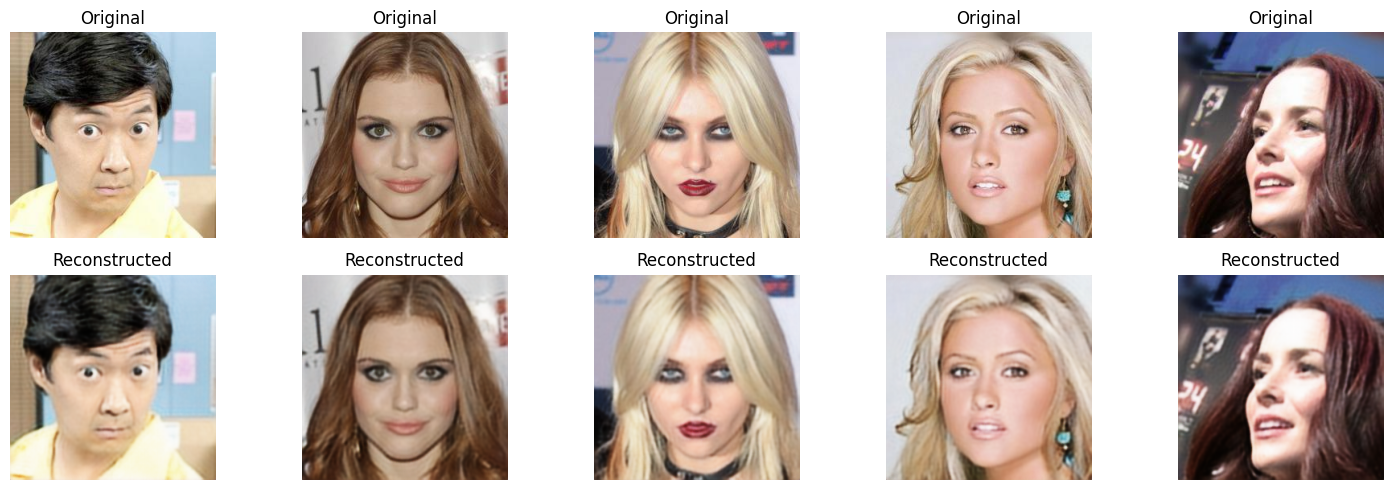

Testing: 100%|██████████| 235/235 [00:11<00:00, 20.59it/s]


Average AUTOENCODER Test Loss: 0.0006
Loaded model weights from ./model_checkpoint_best_vae.pth


Testing:   0%|          | 0/235 [00:00<?, ?it/s]

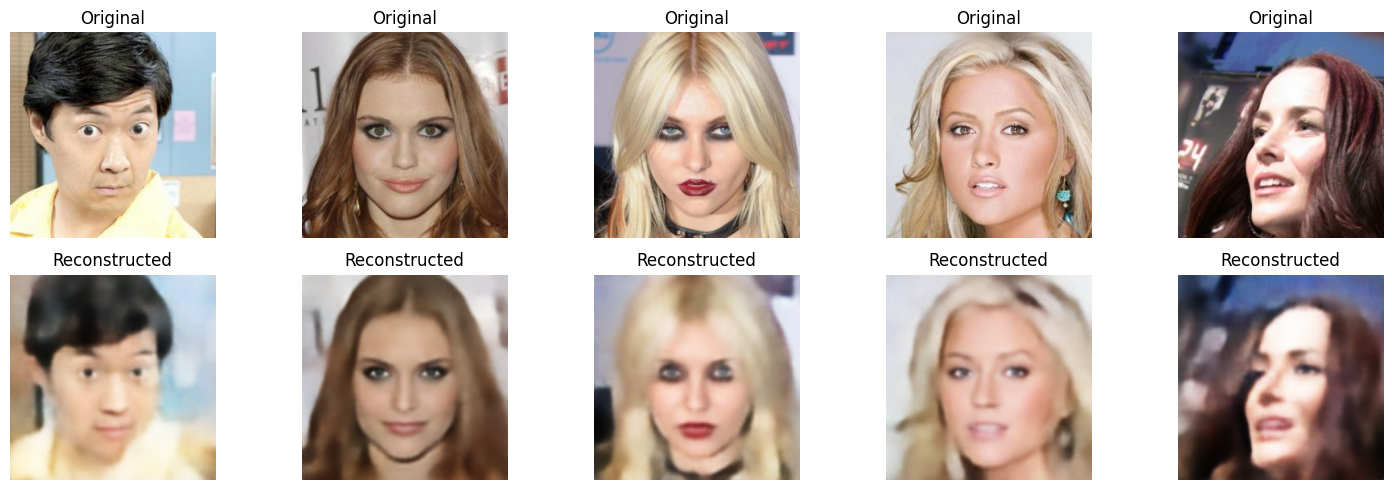

Testing: 100%|██████████| 235/235 [00:11<00:00, 20.97it/s]


Average VAE Test Loss: 12644626.4255
Loaded model weights from ./model_checkpoint_generator.pth


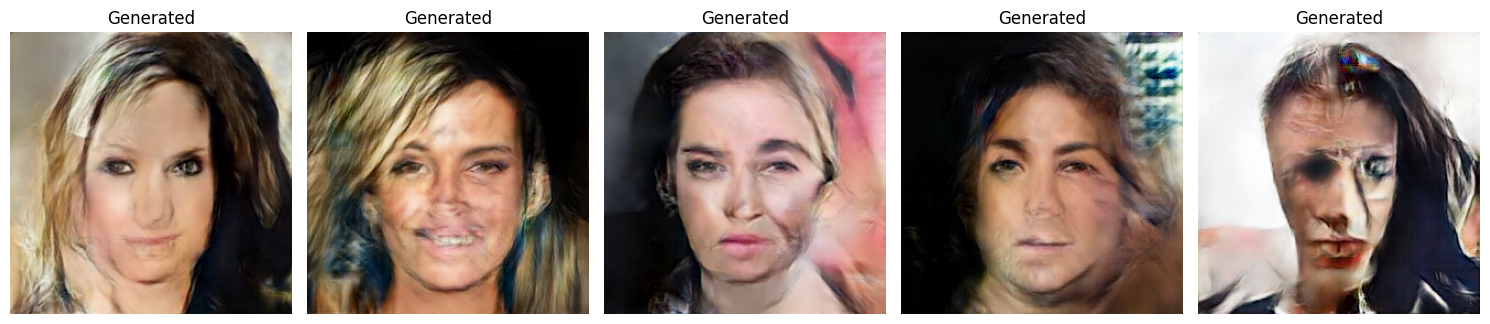

Generated images plotted.


In [2]:
from VAE import VAE
from dataloader import Dataset
from lab7.AutoEncoder import Autoencoder
from tester import test_model
from Gan import Generator

vae = VAE(latent_dim=512)
test_loader = Dataset('./test.json')
aue = Autoencoder()
generator = Generator(latent_dim=512)

test_model(
    model=aue,
    dataloader=test_loader,
    model_type="autoencoder",
    plot_results=True,checkpoint_path='./model_checkpoint_best_autoencoder.pth',
    device='cuda'
)
test_model(
    model=vae,
    dataloader=test_loader,
    model_type="vae",
    plot_results=True,checkpoint_path='./model_checkpoint_best_vae.pth',
    device='cuda'
)
test_model(
    model=generator,
    dataloader=test_loader,
    model_type="gan",
    latent_dim=512,
    plot_results=True,checkpoint_path='./model_checkpoint_generator.pth',
    device='cuda'
)